<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Clust_Metrics_V_measure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Аналог f-меры, но для кластеризации

In [6]:
# импорт
from sklearn import datasets
from sklearn.metrics import (homogeneity_score,                  # однородность
                             completeness_score,                 # полнота
                             v_measure_score,                    # v-мера
                             homogeneity_completeness_v_measure) # все сразу                  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# данные
X_blob, y_blob       = datasets.  make_blobs(n_samples=100,
                                             n_features=2,
                                             centers=3,
                                             cluster_std=2,
                                             random_state=42)

X_moons, y_moons     = datasets.  make_moons(n_samples=100,
                                             noise=0.1,
                                             random_state=42)

X_circles, y_circles = datasets.make_circles(n_samples=100,
                                             noise=0.2,
                                             factor=0.3,
                                             random_state=42)

In [4]:
# стандартизация
scaler = StandardScaler()
X_blob_std    = scaler.fit_transform(X_blob)
X_moons_std   = scaler.fit_transform(X_moons)
X_circles_std = scaler.fit_transform(X_circles)

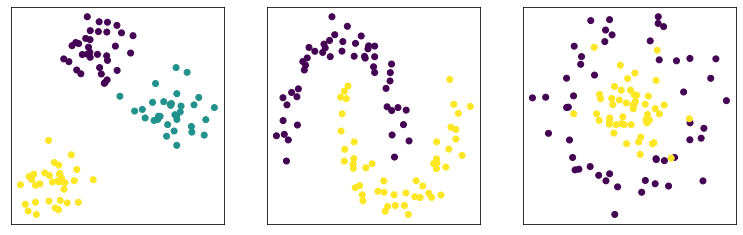

In [5]:
# печать
plt.figure(figsize=(13, 4))

plt.subplot(131)
plt.scatter(X_blob_std[:, 0], X_blob_std[:, 1], c=y_blob)
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.scatter(X_moons_std[:, 0], X_moons_std[:, 1], c=y_moons)
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.scatter(X_circles_std[:, 0], X_circles_std[:, 1], c=y_circles)
plt.xticks([])
plt.yticks([])
plt.show()

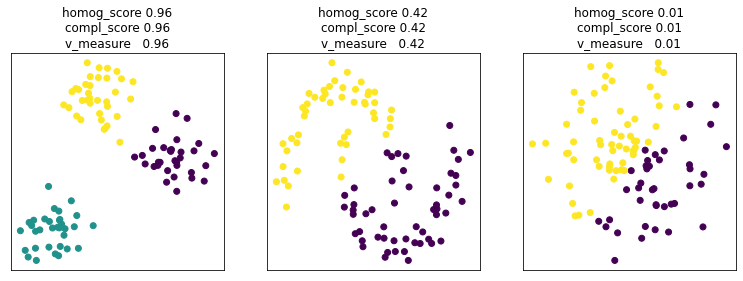

In [14]:
# обучение моделей, печать и вывод значения метрик
# печать
plt.figure(figsize=(13, 4))
plt.subplot(131)
# обучение и предсказание меток
kmeans = KMeans(n_clusters=3, random_state=42)
y_blob_kmeans = kmeans.fit_predict(X_blob_std)
plt.scatter(X_blob_std[:, 0], X_blob_std[:, 1], c=y_blob_kmeans)
# вывод метрики
plt.title(f'homog_score {homogeneity_score(y_blob, y_blob_kmeans):.2f}\n\
compl_score {completeness_score(y_blob, y_blob_kmeans):.2f}\n\
v_measure   {v_measure_score(y_blob, y_blob_kmeans):.2f}')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
# обучение и предсказание меток
kmeans = KMeans(n_clusters=2, random_state=42)
y_moons_kmeans = kmeans.fit_predict(X_moons_std)
plt.scatter(X_moons_std[:, 0], X_moons_std[:, 1], c=y_moons_kmeans)
# вывод метрики
plt.title(f'homog_score {homogeneity_score(y_moons, y_moons_kmeans):.2f}\n\
compl_score {completeness_score(y_moons, y_moons_kmeans):.2f}\n\
v_measure   {v_measure_score(y_moons, y_moons_kmeans):.2f}')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
# обучение и предсказание меток
kmeans = KMeans(n_clusters=2, random_state=42)
y_circles_kmeans = kmeans.fit_predict(X_circles_std)
plt.scatter(X_circles_std[:, 0], X_circles_std[:, 1], c=y_circles_kmeans)
# вывод метрики
plt.title(f'homog_score {homogeneity_score(y_circles, y_circles_kmeans):.2f}\n\
compl_score {completeness_score(y_circles, y_circles_kmeans):.2f}\n\
v_measure   {v_measure_score(y_circles, y_circles_kmeans):.2f}')
plt.xticks([])
plt.yticks([])
plt.show()

(0.06232101450135823, 0.03188536246797082, 0.04218670116980353)


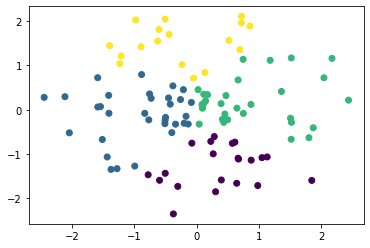

In [17]:
# также можно вывести все метрики сразу
kmeans = KMeans(n_clusters=4, random_state=42)
y_circles_pred = kmeans.fit_predict(X_circles_std)
print(homogeneity_completeness_v_measure(y_circles, y_circles_pred))
plt.scatter(X_circles_std[:, 0], X_circles_std[:, 1], c=y_circles_pred)
plt.show()